In [13]:
import pandas as pd
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa import seasonal
from statsmodels.tsa import api
from statsmodels.tsa import stattools
from statsmodels.tsa import ar_model

In [2]:
df = pd.read_csv('data/AirPassengers.csv', index_col='Month', parse_dates=['Month'])

In [3]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


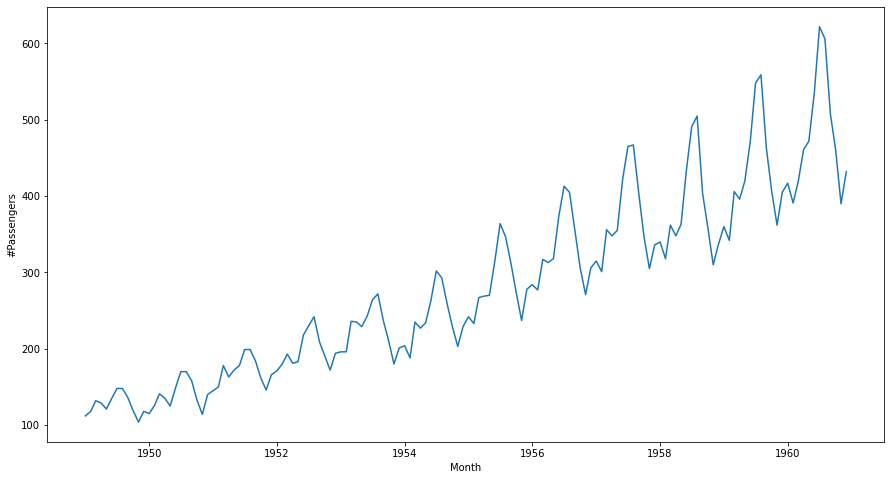

In [5]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='Month', y='#Passengers')
plt.show()

<Figure size 1080x576 with 0 Axes>

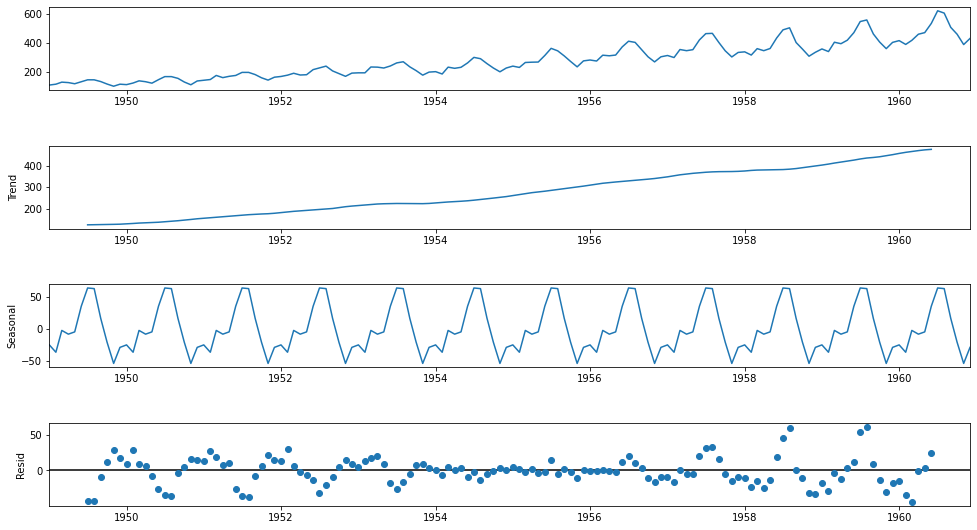

In [6]:
plt.figure(figsize=(15, 8))
decomposition = seasonal.seasonal_decompose(df)
fig = decomposition.plot()
fig.set_size_inches((15, 8))
plt.show()

In [7]:
def exp_smth(x_t_1, a, s_t_1):
    return a*x_t_1 + (1-a)* s_t_1

data = np.array([15, 20, 25, 30, 25, 27])
a = 0.7
s = np.zeros(7)
print(s)
s[0] = data[0]
for t, x_t in enumerate(data):
    s[t+1] = exp_smth(x_t, a, s[t])
    
print(s)

[0. 0. 0. 0. 0. 0. 0.]
[15.      15.      18.5     23.05    27.915   25.8745  26.66235]


In [8]:
ses = api.SimpleExpSmoothing(data)
alpha = 0.7
model = ses.fit(smoothing_level=alpha, optimized=False)
forecast = model.forecast(1)
print(forecast)

[26.66235]


In [9]:
df = pd.read_csv('data/daily-total-female-births.csv', squeeze=True, header=0, index_col=0)
df

/tmp/ipykernel_4158/1307557015.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('data/daily-total-female-births.csv', squeeze=True, header=0, index_col=0)


Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Births, Length: 365, dtype: int64

In [10]:
result = stattools.adfuller(df.values)

print('ADF statistic: %f' % result[0])
print('p_value: %f' % result[1])
print('Critical values: ')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF statistic: -4.808291
p_value: 0.000052
Critical values: 
	1%: -3.449
	5%: -2.870
	10%: -2.571


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


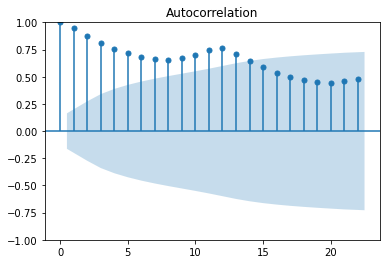

In [11]:
from statsmodels.graphics import tsaplots
df = pd.read_csv('data/AirPassengers.csv', index_col='Month', parse_dates=['Month'])
tsaplots.plot_acf(df)
df

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
df

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [17]:
train_data = df['Consumption'][:len(df) - 100]
test_data = df['Consumption'][len(df) - 100:]

In [20]:
armodel = ar_model.AutoReg(train_data, lags=8).fit()
print(armodel.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Sun, 02 Oct 2022   AIC                          48483.625
Time:                        13:41:02   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

In [21]:
pred = armodel.predict(start=len(train_data), end=(len(df)-1), dynamic=False)
pred

4283    1199.580761
4284    1132.051688
4285    1392.772651
4286    1425.877770
4287    1424.606502
           ...     
4378    1355.220188
4379    1359.014426
4380    1334.516355
4381    1299.851112
4382    1309.602440
Length: 100, dtype: float64